<a href="https://colab.research.google.com/github/YAMSANISAHITHI/2216125_AIML_BootCamp/blob/main/Assingment9(dataset2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_json("/content/drive/MyDrive/dataset.json", lines= True)

In [ ]:
df.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [ ]:
df.shape

(20001, 3)

In [ ]:
df["label"] = df.annotation.apply(lambda x: x.get('label'))
df["label"] = df.label.apply(lambda x: x[0])

In [ ]:
df.head()

,content,annotation,extras,label
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN,1
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN,1
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN,1
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN,1
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN,1


In [ ]:
df = df.drop(['annotation','extras'],axis='columns')

In [ ]:
df

,content,label
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [ ]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1:].values

In [ ]:
X

array([[' Get fucking real dude.'],
       [" She is as dirty as they come  and that crook Rengel  the Dems are so fucking corrupt it's a joke. Make Republicans look like  ..."],
       [" why did you fuck it up. I could do it all day too. Let's do it when you have an hour. Ping me later to sched writing a book here."],
       ...,
       ['  hahahahaha >:) im evil mwahahahahahahahahaha'],
       [' What&;s something unique about Ohio? :)'],
       [' Who is the biggest gossiper you know?']], dtype=object)

In [ ]:
Y

array([['1'],
       ['1'],
       ['1'],
       ...,
       ['0'],
       ['0'],
       ['0']], dtype=object)

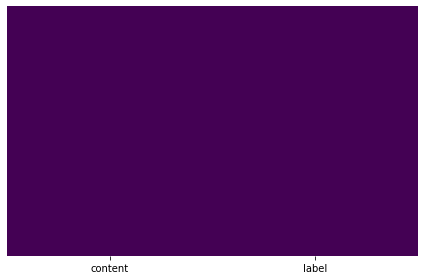

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)


In [ ]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1,shuffle=True)

In [ ]:
X_train.shape

(16000, 1)

In [ ]:
X_test.shape

(4001, 1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
#Transform the Training data into freqq vectors and return the matrix
training_data=count_vector.fit_transform(X_train.flatten())
#Transform the Testing data into freq vectors and return the matrix
testing_data=count_vector.transform(X_test.flatten())

In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(training_data,Y_train)
y_pred=model1.predict(testing_data)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))


In [ ]:
print("Predicted value for training data (LogisticRegression):",model1.score(training_data,Y_train)*100)
print("Predicted value for testing data (LogisticRegression):",model1.score(testing_data,Y_test)*100)

Predicted value for training data (LogisticRegression): 93.28125
Predicted value for testing data (LogisticRegression): 82.50437390652337


In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(training_data,Y_train)
y_pred=model2.predict(testing_data)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[['1' '0']
 ['0' '0']
 ['0' '1']
 ...
 ['0' '0']
 ['0' '0']
 ['1' '1']]


In [ ]:
print("Predicted value for training data(knn):",model2.score(training_data,Y_train)*100)
print("Predicted value for testing data(knn):",model2.score(testing_data,Y_test)*100)

Predicted value for training data(knn): 81.46875
Predicted value for testing data(knn): 69.85753561609597


In [ ]:
#naviebayes
from sklearn.naive_bayes import MultinomialNB
model3=MultinomialNB()
model3.fit(training_data,Y_train)
y_pred=model3.predict(testing_data)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[['1' '0']
 ['0' '0']
 ['0' '1']
 ...
 ['0' '0']
 ['0' '0']
 ['1' '1']]
Predicted value for training data: 88.2125
Predicted value for testing data: 79.33016745813546


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Predicted value for training data (naviebayes):",model3.score(training_data,Y_train)*100)
print("Predicted value for testing data (naviebayes):",model3.score(testing_data,Y_test)*100)

Predicted value for training data (naviebayes): 88.2125
Predicted value for testing data (naviebayes): 79.33016745813546


In [ ]:
#SVC
from sklearn.svm import SVC
model4=SVC()
model4.fit(training_data,Y_train)
y_pred=model4.predict(testing_data)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[['1' '0']
 ['0' '0']
 ['0' '1']
 ...
 ['0' '0']
 ['0' '0']
 ['1' '1']]


In [ ]:
print("Predicted value for training data(SVC):",model4.score(training_data,Y_train)*100)
print("Predicted value for testing data (SVC):",model4.score(testing_data,Y_test)*100)

Predicted value for training data(SVC): 96.00625000000001
Predicted value for testing data (SVC): 87.95301174706324


In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model5=DecisionTreeClassifier()
model5.fit(training_data,Y_train)
y_pred=model5.predict(testing_data)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[['1' '0']
 ['0' '0']
 ['0' '1']
 ...
 ['0' '0']
 ['1' '0']
 ['1' '1']]


In [ ]:
print("Predicted value for training data (DecisionTreeClassifier):",model5.score(training_data,Y_train)*100)
print("Predicted value for testing data (DecisionTreeClassifier):",model5.score(testing_data,Y_test)*100)

Predicted value for training data (DecisionTreeClassifier): 99.56875
Predicted value for testing data (DecisionTreeClassifier): 85.60359910022495


In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model6=RandomForestClassifier()
model6.fit(training_data,Y_train)
y_pred=model6.predict(testing_data)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[['1' '0']
 ['0' '0']
 ['1' '1']
 ...
 ['0' '0']
 ['0' '0']
 ['1' '1']]


In [ ]:
print("Predicted value for training data(RandomForestClassifier):",model6.score(training_data,Y_train)*100)
print("Predicted value for testing data(RandomForestClassifier):",model6.score(testing_data,Y_test)*100)

Predicted value for training data(RandomForestClassifier): 99.56875
Predicted value for testing data(RandomForestClassifier): 92.02699325168709
